<a href="https://colab.research.google.com/github/ayamyeagah/capstone-EpidermAI/blob/main/EpidermAi_ISIC_Labelled_8Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EpidermAI Capstone Project**
This notebook builded up by machine learning team of EpidermAI project.


# Install All Module

In [ ]:
# Install Kaggle module
!pip install -q kaggle

# Install split-folders module
!pip install split-folders

# Kalo install modul taruh sini aja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import All Module

In [ ]:
import os
import shutil
import random
import pathlib
import splitfolders
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import lite
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.regularizers import l2, L1L2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.applications import MobileNetV2
from keras.losses import CategoricalCrossentropy
from google.colab import files
from PIL import Image

# Kalo import modul taruh sini aja

# Load Dataset
Dataset from Kaggle contain 25000 images of skin disease belonging to 8 classes.
This dataset is to facilitate image classification for 8 skin disease:

1.   Actinic keatosis
2.   Basal cell carcinoma
3.   Benign keratosis
4.   Dermatofibroma
5.   Melanocytic nevus
6.   Melanoma
7.   Squamous cell carcinoma
8.   Vascular lesion




## Get Data from Kaggle

In [ ]:
# Load data from Kaggle
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"delibread","key":"bbf89e31fca38afd930cca1a5f177eb0"}'}

In [ ]:
# Make sure kaggle.json succesfully uploaded
!ls

kaggle.json  sample_data


In [ ]:
# Make a directory named Kaggle and move kaggle.json to directory

!mkdir ~/.kaggle
!cp ./kaggle.json /root/.kaggle/

#Change permission of the file
!chmod 600 ~/.kaggle/kaggle.json

# Check the file if exist on directory
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22615        626  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1136         28  1.0              
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           2672         60  1.0              
darshanprabhu09/stock-prices-f

In [ ]:
# Download datasets
!kaggle datasets download -d riyaelizashaju/isic-skin-disease-image-dataset-labelled

100% 9.09G/9.10G [05:53<00:00, 28.3MB/s]
100% 9.10G/9.10G [05:53<00:00, 27.7MB/s]


## Unzip Data
Unzip isic-skin-disease-image-dataset-labelled.zip dataset

In [ ]:
# Unzip
!7za x "/content/isic-skin-disease-image-dataset-labelled.zip"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 9766946647 bytes (9315 MiB)

Extracting archive: /content/isic-skin-disease-image-dataset-labelled.zip
 16% 4096 Open              --
Path = /content/isic-skin-disease-image-dataset-labelled.zip
Type = zip
Physical Size = 9766946647
64-bit = +

  0%      0% 144 - ISIC_Labelled/Actinic keratosis/ISIC_0053738.jpg                                                             0% 195 - ISIC_Labelled/Actinic keratosis/ISIC_0055452.jpg                                                      

In [ ]:
print(os.listdir('ISIC_Labelled'))

<class 'list'>


## Split Data
Split the dataset with a ratio of train 80% val 10% test 10%

In [ ]:
# Split data to train, validation, & test with ratio (80:10:10)
splitfolders.ratio("/content/ISIC_Labelled", output="split_dataset",seed=1337, ratio=(.8, .15, .05))

Copying files: 25331 files [01:13, 343.47 files/s]


In [ ]:
# Check result of splitting dataset
!ls split_dataset

test  train  val


In [ ]:
# Check the number of images for each class in train directory
print("----- IMAGES FOR TRAINING -----")
for train_label in os.listdir('split_dataset/train'):
  dir = f"split_dataset/train/{train_label}"
  print(f"{len(os.listdir(dir))} images of {train_label}")

# Check the number of images for each class in val directory
print("\n----- IMAGES FOR VALIDATION -----")
for val_label in os.listdir('split_dataset/val'):
  dir = f"split_dataset/val/{val_label}"
  print(f"{len(os.listdir(dir))} images of {val_label}")

# Check the number of images for each class in test directory
print("\n----- IMAGES FOR TEST -----")
for test_label in os.listdir('split_dataset/test'):
  dir = f"split_dataset/test/{test_label}"
  print(f"{len(os.listdir(dir))} images of {test_label}")

----- IMAGES FOR TRAINING -----
2658 images of Basal cell carcinoma
3617 images of Melanoma
202 images of Vascular lesion
693 images of Actinic keratosis
502 images of Squamous cell carcinoma
10300 images of Melanocytic nevus
191 images of Dermatofibroma
2099 images of Benign keratosis

----- IMAGES FOR VALIDATION -----
498 images of Basal cell carcinoma
678 images of Melanoma
37 images of Vascular lesion
130 images of Actinic keratosis
94 images of Squamous cell carcinoma
1931 images of Melanocytic nevus
35 images of Dermatofibroma
393 images of Benign keratosis

----- IMAGES FOR TEST -----
167 images of Basal cell carcinoma
227 images of Melanoma
14 images of Vascular lesion
44 images of Actinic keratosis
32 images of Squamous cell carcinoma
644 images of Melanocytic nevus
13 images of Dermatofibroma
132 images of Benign keratosis


# **Configuration**

In [ ]:
train_dir = "split_dataset/train"
val_dir = "split_dataset/val"
test_dir = "split_dataset/test"
img_size = 128

## Plotting Data

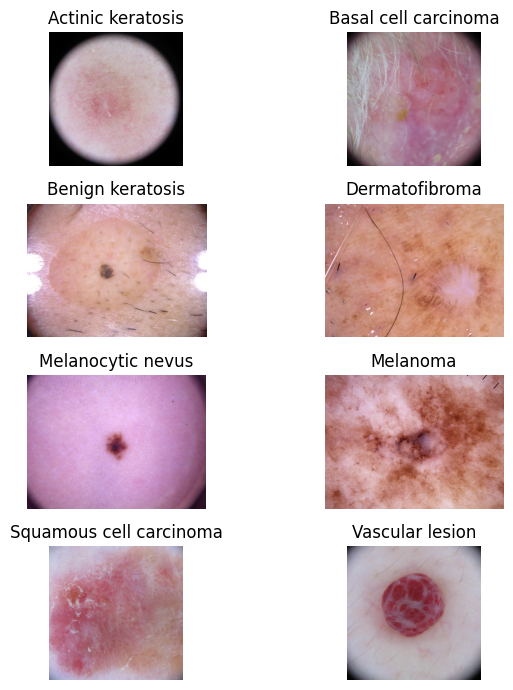

In [ ]:
# Takes the class name from the folder name
class_names = sorted(os.listdir(train_dir))

# Plot some sample images from the data train
plt.figure(figsize=(7, 7))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    image = plt.imread(image_path)

    plt.subplot(4, 2, i+1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()


# Image Data Generator

Preprocessing the image before training with model. The images have a resolution **1024x1024** and resized to **256x256**.

In [ ]:
def train_val_generators(train_dir, val_dir):
  """
  Creates the training and validation data generators
  """
  # Instantiate the ImageDataGenerator class for training
  # Normalize pixel value
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     rotation_range=20)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=64,
                                                      target_size=(128,128))

  # Instantiate the ImageDataGenerator class for validation
  validation_datagen = ImageDataGenerator(rescale=1/255)
  
  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=64,
                                                                target_size=(128,128))
  return train_generator, validation_generator

In [ ]:
# Test the function above
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 20262 images belonging to 8 classes.
Found 3796 images belonging to 8 classes.


# Create Model

In [ ]:
def create_model():
  """
  create the model using CNN
  """
  # Define model
  # untuk layer ini cuma ngasal, belum aku training
  model = Sequential([
      # First convolution
      Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
      MaxPooling2D(2,2),
      # Second convolution
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      # Flatten layer
      Flatten(),
      # Hidden layer (1024)
      Dense(1024, activation='relu'),
      # Output layer
      Dense(8, activation='softmax')
  ])
  
  return model

In [ ]:
# Save model
model = create_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 115200)            0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **Adjusting The Learning Rate**

In [ ]:
lr = ReduceLROnPlateau(monitor='val_accuracy',
                       patience=1,
                       verbose=1,
                       factor=0.3,
                       min_lr=0.05)

## **Train Model**

In [ ]:
EPOCHS = 10

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[lr])

Epoch 1/10
317/317 [==============================] - 499s 2s/step - loss: 1.4560 - accuracy: 0.5292 - val_loss: 1.2747 - val_accuracy: 0.5290 - lr: 0.0010
Epoch 2/10
317/317 [==============================] - 450s 1s/step - loss: 1.1881 - accuracy: 0.5691 - val_loss: 1.1776 - val_accuracy: 0.5785 - lr: 0.0010
Epoch 3/10
317/317 [==============================] - 437s 1s/step - loss: 1.1478 - accuracy: 0.5843 - val_loss: 1.1357 - val_accuracy: 0.5922 - lr: 0.0010
Epoch 4/10
317/317 [==============================] - 433s 1s/step - loss: 1.1036 - accuracy: 0.5984 - val_loss: 1.0935 - val_accuracy: 0.5975 - lr: 0.0010
Epoch 5/10
317/317 [==============================] - 434s 1s/step - loss: 1.0726 - accuracy: 0.6077 - val_loss: 1.0418 - val_accuracy: 0.6162 - lr: 0.0010
Epoch 6/10
317/317 [==============================] - 435s 1s/step - loss: 1.0314 - accuracy: 0.6204 - val_loss: 1.0250 - val_accuracy: 0.6315 - lr: 0.0010
Epoch 7/10
317/317 [==============================] - 438s 1s/st

Look the training history:

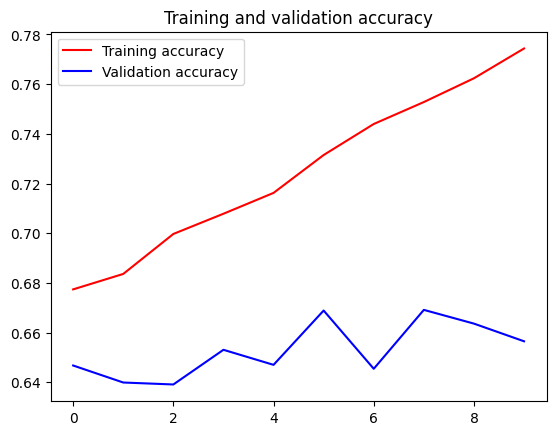

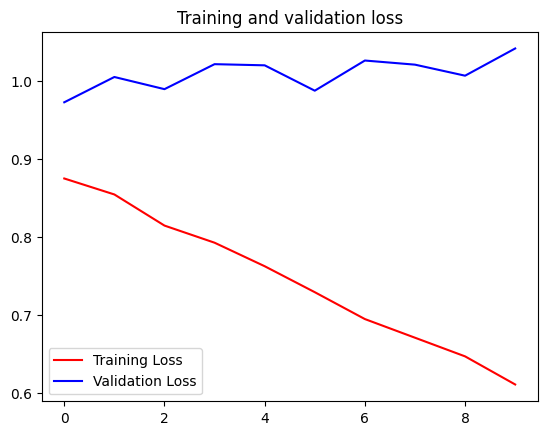

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model Prediction
Use test set for predict the model (5% of dataset)

/content/split_dataset/test/Basal cell carcinoma/ISIC_0030335.jpg


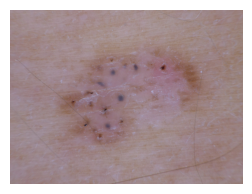

1/1 [==============================] - 0s 194ms/step
10.62% chance to be AK
13.31% chance to be BCC
29.84% chance to be BK
0.42% chance to be DF
11.97% chance to be MN
7.80% chance to be MEL
25.33% chance to be SCC
0.71% chance to be VL

/content/split_dataset/test/Vascular lesion/ISIC_0027210.jpg


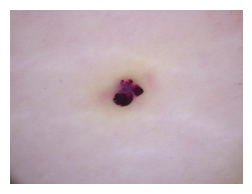

1/1 [==============================] - 0s 19ms/step
0.00% chance to be AK
0.56% chance to be BCC
16.61% chance to be BK
0.01% chance to be DF
9.34% chance to be MN
1.52% chance to be MEL
0.00% chance to be SCC
71.97% chance to be VL

/content/split_dataset/test/Benign keratosis/ISIC_0070742.jpg


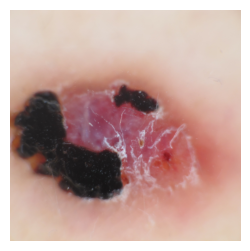

1/1 [==============================] - 0s 18ms/step
0.00% chance to be AK
31.19% chance to be BCC
1.28% chance to be BK
0.00% chance to be DF
4.33% chance to be MN
60.75% chance to be MEL
0.93% chance to be SCC
1.52% chance to be VL

/content/split_dataset/test/Melanoma/ISIC_0062102.jpg


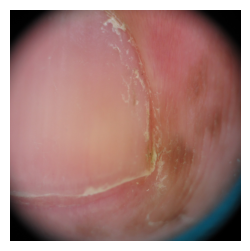

1/1 [==============================] - 0s 19ms/step
58.05% chance to be AK
6.57% chance to be BCC
4.28% chance to be BK
0.00% chance to be DF
4.44% chance to be MN
26.32% chance to be MEL
0.34% chance to be SCC
0.00% chance to be VL

/content/split_dataset/test/Squamous cell carcinoma/ISIC_0066030.jpg


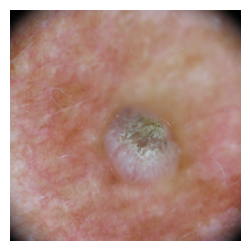

1/1 [==============================] - 0s 18ms/step
6.28% chance to be AK
3.92% chance to be BCC
75.04% chance to be BK
0.20% chance to be DF
3.57% chance to be MN
10.21% chance to be MEL
0.77% chance to be SCC
0.01% chance to be VL



In [ ]:
# Test 5 images
for i in range(5):
  # Get test directory
  test_dir = '/content/split_dataset/test/'

  # Pick 1 random label directory on test directory
  random_label = test_dir + random.choice(os.listdir(test_dir)) + '/'

  # Pick 1 random image on random_label directory (i.e Melanoma)
  random_images = random_label + random.choice(os.listdir(random_label))

  # Check which image was choosen
  print(random_images)

  # Show Image was selected
  plt.figure(figsize=(3, 3))
  image = plt.imread(random_images)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

  # Set path to be equal to random_images
  path = random_images

  # Load images and convert to array
  img = load_img(path, target_size=(128, 128))
  x = img_to_array(img)

  # Normalize, expand dimension, and stack array vertically of images
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # Predict images using model.predict
  classes = model.predict(images, batch_size=10)

  # Define label of disease with acronym
  labels = ['AK', 'BCC', 'BK', 'DF', 'MN', 'MEL', 'SCC', 'VL']

  # Iterate classes[0] to get the predicted value
  for i, value in enumerate(classes[0]):
    # Format value to percent(%)
    predict = format(value * 100, ".2f")

    # Get label
    label = labels[i]

    # Prediction result
    print(f"{predict}% chance to be {label}")
  print()

# Image Prediction

In [ ]:
# uploaded = files.upload()

# for fn in uploaded.keys():
#   path = fn 
#   img = tf.keras.utils.load_img(path, target_size =(150,150))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)

#   print(fn)
#   print(classes)

## Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'filters': [32, 64, 128],
    'kernel_size': [(3, 3), (5, 5), (7, 7)],
    'pool_size': [(2, 2), (3, 3)],
    'units': [512, 1024, 2048],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Create a function to build the CNN model
def build_model(filters, kernel_size, pool_size, units, dropout_rate):
    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, input_shape=(254, 254, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(filters=filters*2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Conv2D(filters=filters*4, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(units=units, activation='relu'))
    model.add(Dense(units=8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=0)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(train_label, val_label)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
predictions = best_model.predict(X_test)


<ipython-input-26-985fda6350d7>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=0)


ValueError: ignored

In [ ]:
print(train_dir)

# **Exporting to TFLite**

In [ ]:
# Save model in the SavedModel format
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

In [ ]:
optimization = [lite.Optimize.DEFAULT]

In [ ]:
# Convert saved model API
converter = lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimizations
converter.optimizations = optimization

# Invoke to generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)